In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

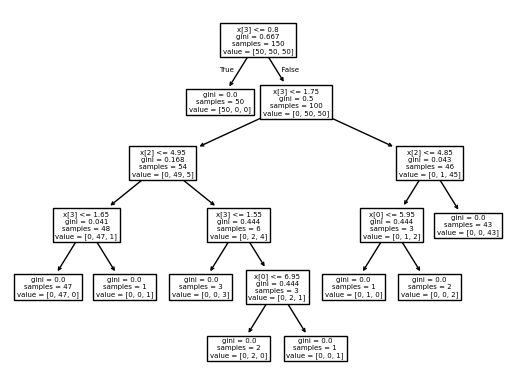

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier().fit(X, y)
tree.plot_tree(clf)


In [ ]:
!pip install graphviz

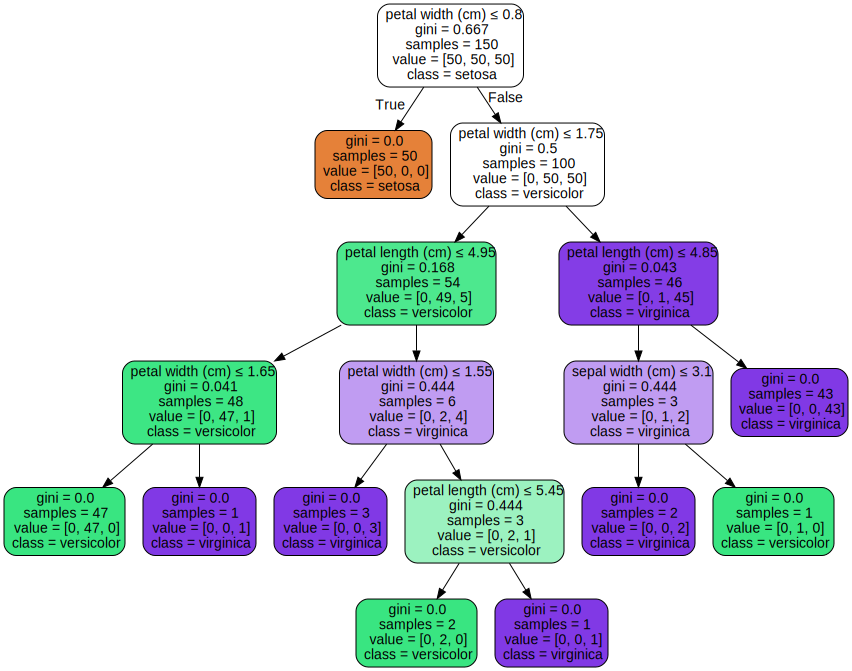

In [ ]:
import graphviz
iris = load_iris()
clf = tree.DecisionTreeClassifier().fit(iris.data, iris.target)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
graph.render("iris")

'iris.pdf'

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/drive/MyDrive/weatherHistory.csv')

In [ ]:
feature = data[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'Loud Cover']]
target = data[['Apparent Temperature (C)']]

In [ ]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, shuffle=False)
print(feature_train.shape, feature_test.shape)

(77162, 7) (19291, 7)


In [ ]:
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(feature_train, target_train)
print(reg.score(feature_train, target_train))
print(reg.score(feature_test, target_test))


0.9645218021739942
0.96757517240544


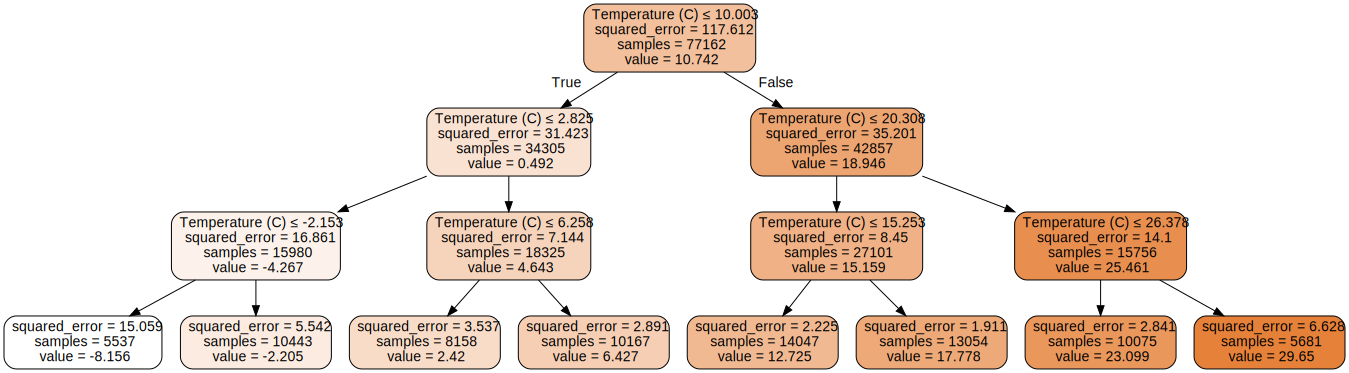

In [ ]:
import graphviz
dot_data = tree.export_graphviz(reg, out_file=None,
                                feature_names=feature.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
new = [20, 50, 10, 180, 10, 0, 1010]
pred = reg.predict([new])
print(pred)

[17.77826592]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import graphviz
data = pd.read_csv('/content/drive/MyDrive/winequalityN.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [ ]:
feature = data[['alcohol', 'residual sugar', 'pH']]
target = data[['type']]

In [ ]:
feature.isnull().sum()

,0
alcohol,0
residual sugar,2
pH,9


In [ ]:
feature.fillna(feature.mean(), inplace=True)
feature.isnull().sum()

<ipython-input-26-4b6ba52d7b71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature.fillna(feature.mean(), inplace=True)


,0
alcohol,0
residual sugar,0
pH,0


In [ ]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=42)
print(feature_train.shape, feature_test.shape)

(5197, 3) (1300, 3)


In [ ]:
ss = StandardScaler()
feature_train = ss.fit_transform(feature_train)
feature_test = ss.transform(feature_test)

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
dt.fit(feature_train, target_train)
print(dt.score(feature_train, target_train))
print(dt.score(feature_test, target_test))

0.8487588993650182
0.8592307692307692


In [ ]:
print(dt.classes_)
print(dt.feature_importances_)

['red' 'white']
[0.08848347 0.901631   0.00988553]


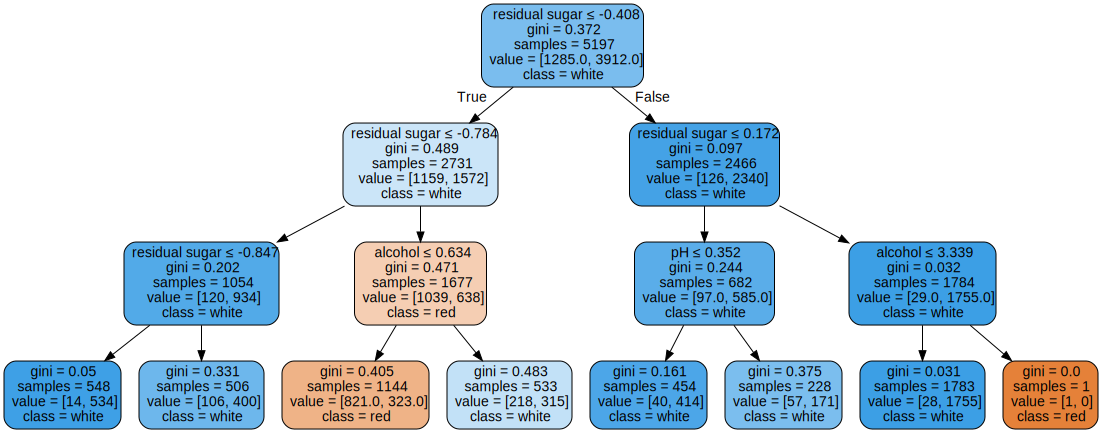

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=feature.columns, class_names=dt.classes_, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
new = [15, 10, 3]
pred = dt.predict([new])
print(pred)

['red']


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
data = pd.read_csv('/content/drive/MyDrive/Car_Purchasing_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [ ]:
feature = ['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']
feature = data[list(feature)]
target = data[['Car Purchase Amount']]
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state=1)
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(feature_train, target_train)
print(reg.score(feature_train, target_train))
print(reg.score(feature_test, target_test))

0.7239776607655881
0.6233804735945401


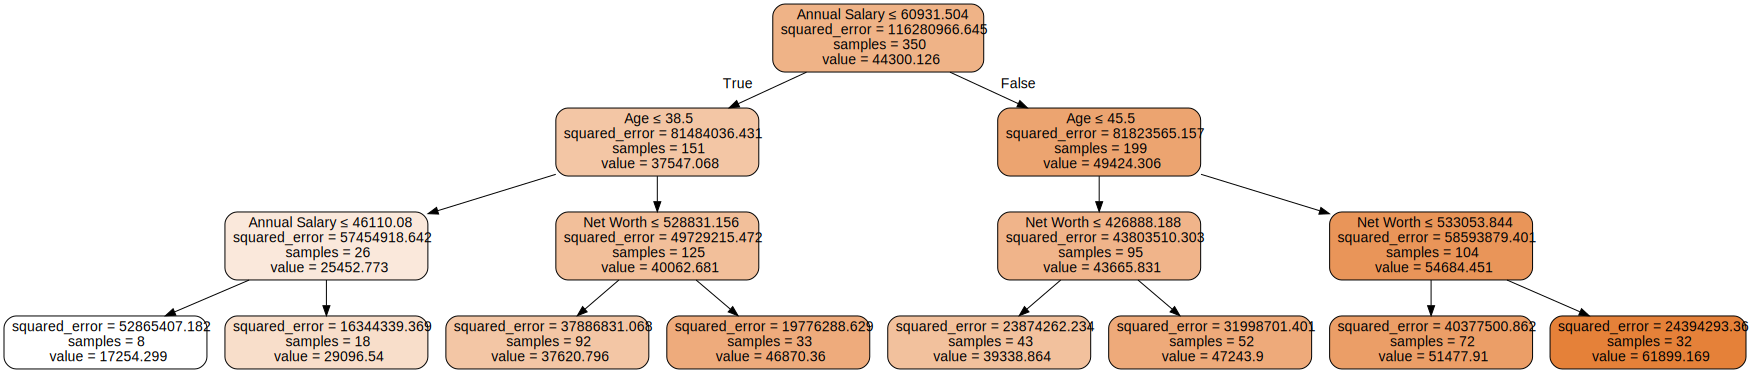

In [ ]:
dot_data = tree.export_graphviz(reg, out_file=None,
                                feature_names=feature.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
new = [1,30,59729,9572,764531]
pred = reg.predict([new])
price = pred[0].astype(int) * 1600
print(price)

46553600


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
